### TO DO:

- All of the text can be edited and rewritten
- Add links/citations
- Check on the empirical targets, both in the CSTW paper/code/repo and recent measurements from the literature


# The Distribution of Wealth and the MPC

This notebook presents an analogous selection of results from the paper [The Distribution of Wealth and the Marginal Propensity to Consume](http://econ.jhu.edu/people/ccarroll/papers/cstwMPC), using the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit. In this version of the model, the results are presented for the estimation procedure with the **rate of return** as the key parameter of interest. 

In [1]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import estimate

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

In [2]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

'\nCopied here from do_min.py.\nDesign decisions about whether to include this code explicitly,\nor import it, or execute it as is here, TBD.\n'

In [3]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "uniform"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = False

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = True

Beginning an estimation with the specification name PYUnifrratePointIndLiquid...
get_KY_ratio_difference tried center = 0.99 and got -2.262299752874752
get_KY_ratio_difference tried center = 1.05 and got 10.12381441446399
get_KY_ratio_difference tried center = 1.0009588837417966 and got -1.951043160209393
get_KY_ratio_difference tried center = 1.0295724111207696 and got 4.12512023627335
get_KY_ratio_difference tried center = 1.0101466266050851 and got -1.3638235132115384
get_KY_ratio_difference tried center = 1.0203152892846863 and got 1.9321279281044976
get_KY_ratio_difference tried center = 1.0143542921327118 and got -0.04224294808228879
get_KY_ratio_difference tried center = 1.0144858182561194 and got 0.025993542662688718
get_KY_ratio_difference tried center = 1.01443571559312 and got 0.00012294541531687742
get_KY_ratio_difference tried center = 1.0144352155931196 and got -0.0001359698586360647
Estimate is center=1.01443571559312, spread=0.0, took 35.90620994567871 seconds.
Running 

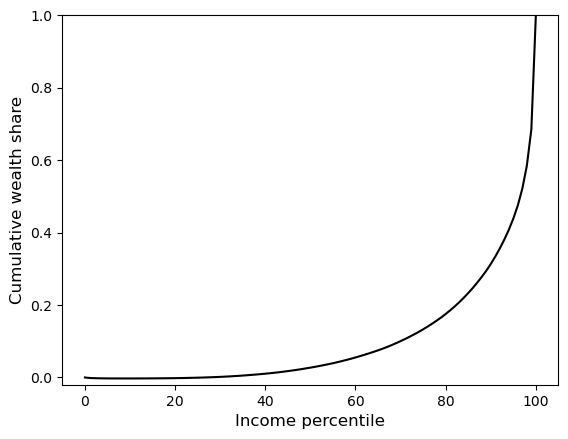

Estimate is center=1.01443571559312, spread=0.0
Lorenz distance is 51.543939061836774
Average MPC for all consumers is 0.108
Average MPC in the top percentile of W/Y is 0.068
Average MPC in the top decile of W/Y is 0.070
Average MPC in the top quintile of W/Y is 0.071
Average MPC in the second quintile of W/Y is 0.072
Average MPC in the middle quintile of W/Y is 0.074
Average MPC in the fourth quintile of W/Y is 0.082
Average MPC in the bottom quintile of W/Y is 0.243
Average MPC in the top percentile of y is 0.079
Average MPC in the top decile of y is 0.084
Average MPC in the top quintile of y is 0.093
Average MPC in the second quintile of y is 0.132
Average MPC in the middle quintile of y is 0.132
Average MPC in the fourth quintile of y is 0.087
Average MPC in the bottom quintile of y is 0.099
Average MPC for the employed is 0.105
Average MPC for the unemployed is 0.151
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
71.352% are in the bottom wealth 

In [4]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}


EstimationEconomy = estimate(options, parameters)

In [5]:
MyGuys = EstimationEconomy.agents[0]
MyGuys.check_conditions()
print(MyGuys.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.01444 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.99803 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.99803 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98383 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.99803 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00129 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99180 : The Mortality-Adjusted Growth Patien

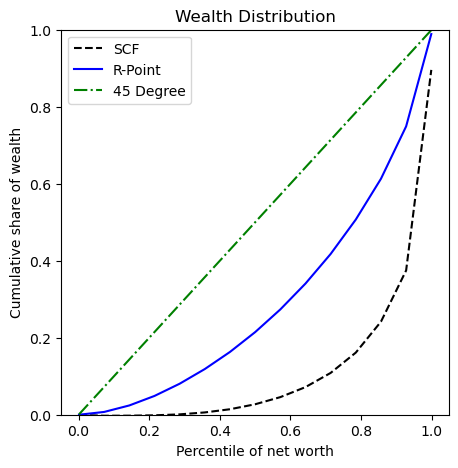

In [6]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Return Preference Heterogeneneity

The analog to the CSTW (link to paper/notebook) work is referred to as the $\Rfree$-Dist model. Here, households no longer have the same rate of return to their assets. Instead, the model assumes that, for some dispersion $\nabla$, the rate of return to assets are distributed uniformly in the population between
$\grave{\Rfree}-\nabla$ and $\grave{\Rfree}+\nabla$. 

From here, using simulations, we search for the values of $\grave{\Rfree}$ and
$\nabla$ for which the model best matches the fraction of net worth held by the top $20$, $40$, $60$, and $80$ percent of the population, while at the same time matching
the aggregate capital-to-output ratio from the perfect foresight
model. For a description of the optimization problem that describes this structural estimation procedure, see (Link to the CSTW notebook). 

The solution to this problem assuming ex-ante heterogeneity in the rate of return is $\{\grave{\Rfree}, \nabla\}=\{1.03218, 0.01332\}$, so that the rate of return to assets is evenly spread roughly between 1.0189 and 1.0455.

Thus, much like the model with time preference heterogeneity, the introduction of even such a relatively modest amount of heterogeneity in the rate of return to assets sharply improves the model's fit to the targeted
proportions of wealth holdings, bringing it reasonably in line with the data. 

In fact, the fit here is better than the analogous, estimation under the simplest specification of the model with heterogeneous time preferences: the *Lorenz distance* in that model is $4.75$, while here it is $2.07$.


In [7]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = True  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

Beginning an estimation with the specification name PYUnifrrateDistIndLiquid...
get_KY_ratio_difference tried center = 0.99 and got -2.2477726020886313
get_KY_ratio_difference tried center = 1.05 and got 11.114348400756679
get_KY_ratio_difference tried center = 1.00009318476435 and got -1.9375858689926186
get_KY_ratio_difference tried center = 1.027949524930052 and got 4.391994961321226
get_KY_ratio_difference tried center = 1.008620455765997 and got -0.7379786202898917
get_KY_ratio_difference tried center = 1.0127464996427782 and got 0.5261910002657664
get_KY_ratio_difference tried center = 1.0110290978642813 and got 0.024005282568349662
get_KY_ratio_difference tried center = 1.0109497091380515 and got -1.9270808121918392e-05
get_KY_ratio_difference tried center = 1.010950209138052 and got 0.00013224137468292874
find_lorenz_distance_at_target_KY tried spread = 0.008257354213751997 and got 14.865680633539398
get_KY_ratio_difference tried center = 0.99 and got -2.2254513931956112
get_KY

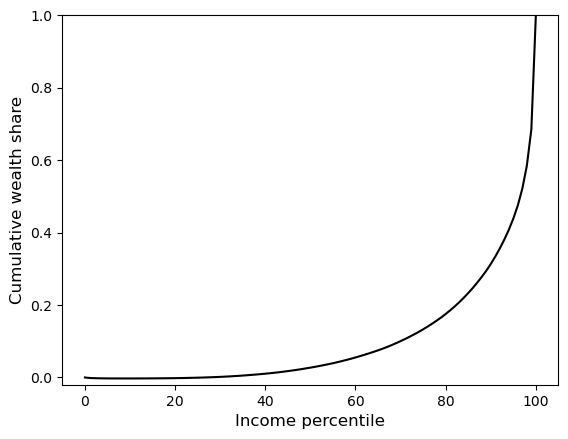

Estimate is center=1.0023866281537572, spread=0.01994814341799608
Lorenz distance is 3.5571817502535046
Average MPC for all consumers is 0.404
Average MPC in the top percentile of W/Y is 0.063
Average MPC in the top decile of W/Y is 0.067
Average MPC in the top quintile of W/Y is 0.070
Average MPC in the second quintile of W/Y is 0.223
Average MPC in the middle quintile of W/Y is 0.420
Average MPC in the fourth quintile of W/Y is 0.539
Average MPC in the bottom quintile of W/Y is 0.767
Average MPC in the top percentile of y is 0.380
Average MPC in the top decile of y is 0.366
Average MPC in the top quintile of y is 0.369
Average MPC in the second quintile of y is 0.397
Average MPC in the middle quintile of y is 0.408
Average MPC in the fourth quintile of y is 0.389
Average MPC in the bottom quintile of y is 0.456
Average MPC for the employed is 0.389
Average MPC for the unemployed is 0.608
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
50.160% are in 

In [8]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": False,
}


EstimationEconomy = estimate(options, parameters)

In [9]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)


sim_wealth_2 = np.concatenate(EstimationEconomy.reap_state["aLvl"])
sim_Lorenz_points_2 = get_lorenz_shares(sim_wealth_2, percentiles=pctiles)



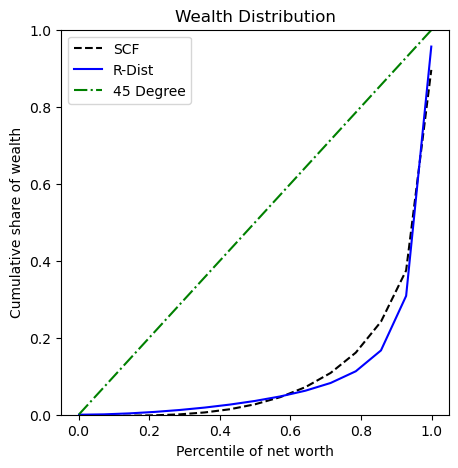

In [10]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points_2, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

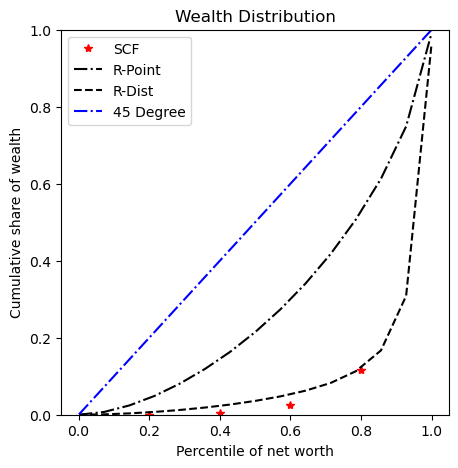

In [17]:
# Plot for the presentation

x = np.array([0.20, 0.40, 0.60, 0.80])
y = np.array([0.0, 0.004, 0.025, 0.117])

plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(x, y, "*r", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-.k", label="R-Point")
plt.plot(pctiles, sim_Lorenz_points_2, "--k", label="R-Dist")
plt.plot(pctiles, pctiles, "b-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

In [12]:
MyGuys_First = EstimationEconomy.agents[0]
MyGuys_First.check_conditions()
print(MyGuys_First.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=0.98529 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.96964 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.96964 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98412 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.96964 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=0.97281 : The Risk-Modified Growth Patience Factor satisfies the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.96358 : The Mortality-Adjusted Growth Patie

In [13]:
MyGuys_Last= EstimationEconomy.agents[-1]
MyGuys_Last.check_conditions()
print(MyGuys_Last.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.01949 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=1.00295 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=1.00295 : The Absolute Patience Factor violates the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98378 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=1.00295 : The Growth Patience Factor violates the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00623 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99668 : The Mortality-Adjusted Growth Patience

## Comparing the Estimation to Data on the Rate of Return

First, we present the graph of the estimated distribution of the rate of return across households which minimizes the Lorenz distance, given the empirical targets for wealth levels from the SCF data.

1.0223347715717532
0.9824384847357611


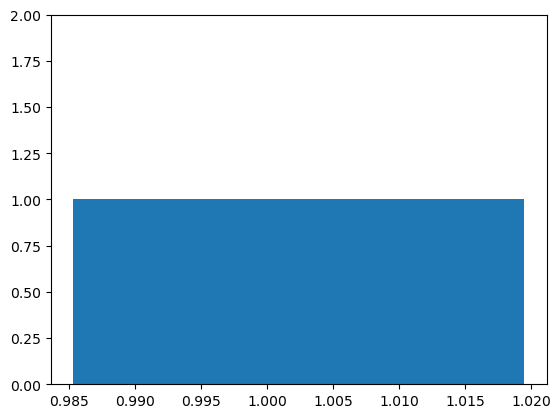

{'Mean': 1.0023866281537572,
 'Standard Deviation': 0.011517065972213284,
 'Skewness': 0,
 'Kurtosis': -1.2}

In [14]:
import re

from code.estimateduniformstats import EstUniformDist

PYUnif_RDist = EstUniformDist("/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/DistributionOfWealthMPC/code/results/PYUnifrrateDistIndLiquidResults.txt")

print(PYUnif_RDist.top)
print(PYUnif_RDist.bottom)

PYUnif_RDist.graph()

PYUnif_RDist.show_moments()

### Graph of the empirical distribution of safe and risky returns from Fagereng et al. (2015)

![Image Description](/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/DistEmpReturnsFagereng.png)

